# 넥스트이지에서 제공하는 골프장데이터를 이용한 사용금액에 따른 결과값 분석

## 사용라이브러리

In [15]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

## 사용데이터

In [16]:
df = pd.read_csv('C:\\workspace\\Next_Ez_Training\\data\\golflike\\골프장오리지널데이터_컬럼한글화2.csv')
df.head(3)

C:\src\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,판매업체명,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간
0,해비치CC,동부권,회원제+대중제,36,20210120.0,815.0,SKY,170000.0,170000.0,현장결제,...,해비치CC,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN
1,아덴힐GC,서부권,대중제,18,20210121.0,809.0,왕이메,90000.0,135000.0,현장결제,...,아덴힐GC,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN
2,아덴힐GC,서부권,대중제,18,20210126.0,823.0,왕이메,90000.0,135000.0,현장결제,...,아덴힐GC,1,50.0,도민,14,NaN,NaN,NaN,NaN,NaN


## 해비치 cc 거주자 금액 사용 현황

<AxesSubplot:ylabel='거주자금액'>

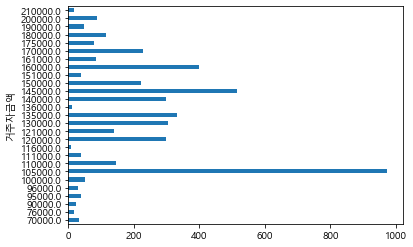

In [17]:
df[df['골프장명']=='해비치CC'].groupby(df.거주자금액).골프장명.count().plot.barh()

## 해비치 cc 거주자 금액 사용 현황

<AxesSubplot:ylabel='비거주자금액'>

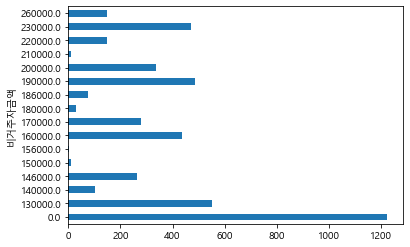

In [18]:
df[df['골프장명']=='해비치CC'].groupby(df.비거주자금액).골프장명.count().plot.barh()

## 해당년도 분석

In [33]:
df.사용일자[df.사용일자>=20210000]

0        20210120.0
1        20210121.0
2        20210126.0
3        20210128.0
4        20210208.0
            ...    
26522    20210115.0
26523    20210113.0
26524    20210115.0
26527    20210127.0
26529    20210119.0
Name: 사용일자, Length: 15435, dtype: float64

In [34]:
df['2021년']=df.사용일자[df.사용일자<20210000]

15013    20200425.0
15014    20200411.0
15015    20200416.0
15016    20200420.0
15017    20200517.0
            ...    
26517    20201231.0
26521    20201224.0
26525    20201231.0
26526    20201226.0
26528    20201228.0
Name: 사용일자, Length: 11095, dtype: float64

In [ ]:
df.head(3)

### 해당년도 칼럼 생성

In [19]:
df['해당년도']='빈값'

In [20]:
df.head(2)

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도
0,해비치CC,동부권,회원제+대중제,36,20210120.0,815.0,SKY,170000.0,170000.0,현장결제,...,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,빈값
1,아덴힐GC,서부권,대중제,18,20210121.0,809.0,왕이메,90000.0,135000.0,현장결제,...,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,빈값


In [21]:
df['해당년도']=df.사용일자.apply(lambda x: str(x)[:4])

In [22]:
df.head(2)

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도
0,해비치CC,동부권,회원제+대중제,36,20210120.0,815.0,SKY,170000.0,170000.0,현장결제,...,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021
1,아덴힐GC,서부권,대중제,18,20210121.0,809.0,왕이메,90000.0,135000.0,현장결제,...,1,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021
2,아덴힐GC,서부권,대중제,18,20210126.0,823.0,왕이메,90000.0,135000.0,현장결제,...,1,50.0,도민,14,NaN,NaN,NaN,NaN,NaN,2021
3,아덴힐GC,서부권,대중제,18,20210128.0,809.0,왕이메,90000.0,135000.0,현장결제,...,0,NaN,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021
4,아덴힐GC,서부권,대중제,18,20210208.0,1121.0,새별,110000.0,145000.0,현장결제,...,2,40.0,도민,30,NaN,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,1,40.0,도민,40,NaN,NaN,NaN,20210615.0,103439.0,nan
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104114.0,nan
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104132.0,nan
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104224.0,nan


### 통화일자 합치기

In [23]:
df['new해당년도']=np.where(df['해당년도']!='nan',df['해당년도'],df['통화일자'])

In [24]:
df['new해당년도']=df['new해당년도'].apply(lambda x: str(x)[:4] if type(x)==float else x)

In [25]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,new해당년도
0,해비치CC,동부권,회원제+대중제,36,20210120.0,815.0,SKY,170000.0,170000.0,현장결제,...,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021,2021
1,아덴힐GC,서부권,대중제,18,20210121.0,809.0,왕이메,90000.0,135000.0,현장결제,...,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021,2021
2,아덴힐GC,서부권,대중제,18,20210126.0,823.0,왕이메,90000.0,135000.0,현장결제,...,50.0,도민,14,NaN,NaN,NaN,NaN,NaN,2021,2021
3,아덴힐GC,서부권,대중제,18,20210128.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021,2021
4,아덴힐GC,서부권,대중제,18,20210208.0,1121.0,새별,110000.0,145000.0,현장결제,...,40.0,도민,30,NaN,NaN,NaN,NaN,NaN,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,도민,40,NaN,NaN,NaN,20210615.0,103439.0,nan,2021
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104114.0,nan,2021
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104132.0,nan,2021
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104224.0,nan,2021


In [26]:
df.rename(columns={'new해당년도':'통화,사용일자년도'},inplace=True)

In [27]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도"
0,해비치CC,동부권,회원제+대중제,36,20210120.0,815.0,SKY,170000.0,170000.0,현장결제,...,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021,2021
1,아덴힐GC,서부권,대중제,18,20210121.0,809.0,왕이메,90000.0,135000.0,현장결제,...,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021,2021
2,아덴힐GC,서부권,대중제,18,20210126.0,823.0,왕이메,90000.0,135000.0,현장결제,...,50.0,도민,14,NaN,NaN,NaN,NaN,NaN,2021,2021
3,아덴힐GC,서부권,대중제,18,20210128.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021,2021
4,아덴힐GC,서부권,대중제,18,20210208.0,1121.0,새별,110000.0,145000.0,현장결제,...,40.0,도민,30,NaN,NaN,NaN,NaN,NaN,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,도민,40,NaN,NaN,NaN,20210615.0,103439.0,nan,2021
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104114.0,nan,2021
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104132.0,nan,2021
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,20210615.0,104224.0,nan,2021


In [28]:
# df.해당년도 = df.해당년도.apply(lambda x: np.NAN if x=='nan' else x)

In [10]:
df['통화,사용일자년도'].value_counts()

2021    34231
2020    11095
Name: 통화,사용일자년도, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45326 entries, 0 to 45325
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   골프장명       45326 non-null  object 
 1   골프장지역명     45326 non-null  object 
 2   골프장멤버십값    45326 non-null  object 
 3   골프장유형값     45326 non-null  int64  
 4   사용일자       26530 non-null  float64
 5   사용시간값      26530 non-null  float64
 6   사용유형명      26530 non-null  object 
 7   거주자금액      26530 non-null  float64
 8   비거주자금액     26530 non-null  float64
 9   결제수단명      26530 non-null  object 
 10  총인원수       26530 non-null  float64
 11  거주자인원수     26530 non-null  float64
 12  비거주자인원수    26530 non-null  float64
 13  예약일자       26530 non-null  float64
 14  예약시간       26530 non-null  float64
 15  판매업체명      45326 non-null  object 
 16  예약자성별코드    45326 non-null  int64  
 17  예약자연령대코드   30098 non-null  float64
 18  예약자거주지값    45326 non-null  object 
 19  예약자평균값     21878 non-null  object 
 20  예약자골프경

In [11]:
df.isnull().sum()

골프장명             0
골프장지역명           0
골프장멤버십값          0
골프장유형값           0
사용일자         18796
사용시간값        18796
사용유형명        18796
거주자금액        18796
비거주자금액       18796
결제수단명        18796
총인원수         18796
거주자인원수       18796
비거주자인원수      18796
예약일자         18796
예약시간         18796
판매업체명            0
예약자성별코드          0
예약자연령대코드     15228
예약자거주지값          0
예약자평균값       23448
예약자골프경력값     25557
예약자평균사용값     25561
예약자사용성향값     26709
통화일자         26530
통화시간         26530
해당년도         18796
통화,사용일자년도        0
dtype: int64

In [ ]:
# df['해당년도']=df['해당년도'].apply(lambda x: '2021' if (df['사용일자']<2021000.0) else '2020')

### 2020년 2021년 차이

<AxesSubplot:ylabel='골프장명'>

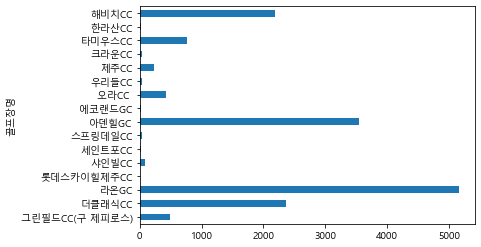

In [83]:
df[df.해당년도=='2021'].groupby(df.골프장명).골프장명.count().plot.barh()

<AxesSubplot:ylabel='골프장명'>

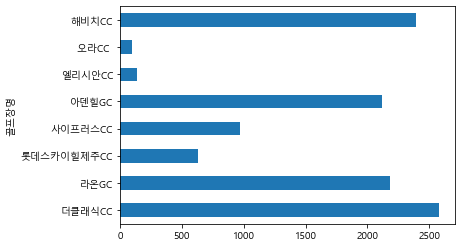

In [84]:
df[df.해당년도=='2020'].groupby(df.골프장명).골프장명.count().plot.barh()

### 월별에서 일별로 바꾸기

In [32]:
# df.사용일자 = df.사용일자.apply(lambda x : int([x]/100))
df.사용일자[pd.notnull]=df.사용일자[pd.notnull].apply(lambda x: int(x/100))

C:\Users\alsdn\AppData\Local\Temp/ipykernel_8504/1789726110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.사용일자[pd.notnull]=df.사용일자[pd.notnull].apply(lambda x: int(x/100))


In [33]:
df.통화일자[pd.notnull]=df.통화일자[pd.notnull].apply(lambda x: int(x/100))

C:\Users\alsdn\AppData\Local\Temp/ipykernel_8504/3283583023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.통화일자[pd.notnull]=df.통화일자[pd.notnull].apply(lambda x: int(x/100))


In [34]:
df

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도"
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021,2021
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,50.0,비도민,8,NaN,NaN,NaN,NaN,NaN,2021,2021
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,50.0,도민,14,NaN,NaN,NaN,NaN,NaN,2021,2021
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021,2021
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,40.0,도민,30,NaN,NaN,NaN,NaN,NaN,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,도민,40,NaN,NaN,NaN,202106.0,103439.0,NaN,2021
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,202106.0,104114.0,NaN,2021
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,202106.0,104132.0,NaN,2021
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,도민,NaN,1~3년,2회,골프초년생,202106.0,104224.0,NaN,2021


In [35]:
# df.to_csv('골프장데이터_해당년도_추가.csv',index=False)

In [113]:
df[df.사용일자==202105.0]

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도"
1791,더클래식CC,동부권,대중제,18,202105.0,705.0,대중제(Valley),70000.0,90000.0,현장결제,...,40.0,도민,20,1~3년,5회이상,NaN,NaN,NaN,2021,2021
1792,라온GC,서부권,대중제,27,202105.0,1221.0,STONE,172500.0,222500.0,현장결제,...,NaN,도민,NaN,1~3년,4회,골프초년생,NaN,NaN,2021,2021
1793,오라CC,제주시권,회원제+대중제,36,202105.0,1236.0,동서,148500.0,148500.0,선결제,...,NaN,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021,2021
1794,라온GC,서부권,대중제,27,202105.0,1214.0,STONE,172500.0,222500.0,현장결제,...,40.0,도민,NaN,4~6년,2회,주말골프,NaN,NaN,2021,2021
1795,해비치CC,동부권,회원제+대중제,36,202105.0,1227.0,LAKE,160000.0,200000.0,현장결제,...,NaN,도민,NaN,1~3년,1회이하,주말골프,NaN,NaN,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,해비치CC,동부권,회원제+대중제,36,202105.0,1213.0,LAKE,160000.0,200000.0,현장결제,...,30.0,도민,1,1~3년,2회,골프초년생,NaN,NaN,2021,2021
4969,라온GC,서부권,대중제,27,202105.0,823.0,STONE,162500.0,222500.0,현장결제,...,40.0,도민,25,1~3년,2회,주중골프,NaN,NaN,2021,2021
4970,아덴힐GC,서부권,대중제,18,202105.0,1336.0,왕이메,140000.0,160000.0,현장결제,...,NaN,도민,NaN,4~6년,3회,NaN,NaN,NaN,2021,2021
4971,라온GC,서부권,대중제,27,202105.0,741.0,LAKE,202500.0,222500.0,현장결제,...,NaN,도민,NaN,NaN,NaN,NaN,NaN,NaN,2021,2021


In [117]:
df[df.사용일자==202005.0].groupby(df.골프장명).count()

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도"
골프장명,,,,,,,,,,,,,,,,,,,,,
더클래식CC,77,77,77,77,77,77,77,77,77,77,...,17,77,6,21,21,21,0,0,77,77
라온GC,6,6,6,6,6,6,6,6,6,6,...,2,6,2,0,0,0,0,0,6,6
아덴힐GC,156,156,156,156,156,156,156,156,156,156,...,22,156,16,53,53,52,0,0,156,156
엘리시안CC,75,75,75,75,75,75,75,75,75,75,...,6,75,1,21,21,20,0,0,75,75
오라CC,22,22,22,22,22,22,22,22,22,22,...,3,22,4,4,4,4,0,0,22,22
해비치CC,22,22,22,22,22,22,22,22,22,22,...,4,22,1,4,4,4,0,0,22,22


### 2020 년 2021년 차이

<AxesSubplot:xlabel='골프장명'>

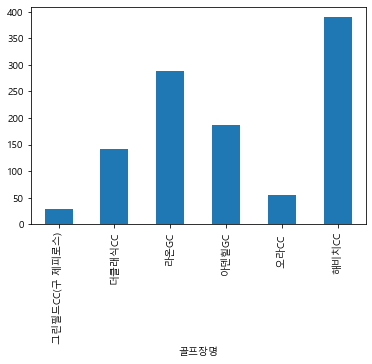

In [126]:
df[df.사용일자==202105.0].groupby(df.골프장명).골프장명.count().plot.bar()

<AxesSubplot:xlabel='골프장명'>

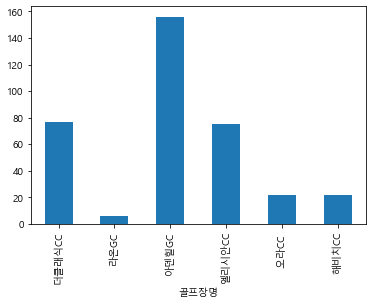

In [127]:
df[df.사용일자==202005.0].groupby(df.골프장명).골프장명.count().plot.bar()

In [132]:
df[df.사용일자==202005.0].groupby(df.골프장명).골프장명.count().keys()

Index(['더클래식CC', '라온GC', '아덴힐GC', '엘리시안CC', '오라CC ', '해비치CC'], dtype='object', name='골프장명')

In [135]:
df[df.사용일자==202005.0].groupby(df.골프장명).골프장명.count().values

array([ 77,   6, 156,  75,  22,  22], dtype=int64)

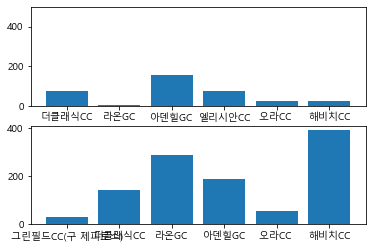

In [147]:
plt.subplot(211)# 2 x 2, 그래프중 첫번째
plt.ylim(0,500)
plt.bar(df[df.사용일자==202005.0].groupby(df.골프장명).골프장명.count().keys(), df[df.사용일자==202005.0].groupby(df.골프장명).골프장명.count().values)
plt.subplot(2, 1, 2)
plt.bar(df[df.사용일자==202105.0].groupby(df.골프장명).골프장명.count().keys(), df[df.사용일자==202105.0].groupby(df.골프장명).골프장명.count().values)
plt.show()

<AxesSubplot:ylabel='사용일자'>

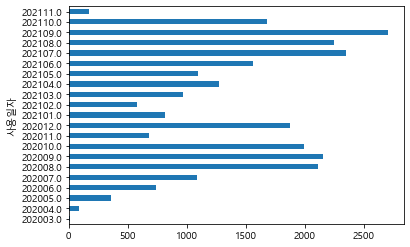

In [157]:
df.groupby(df.사용일자).골프장명.count().plot.barh()

In [158]:
df.groupby(df.사용일자).골프장명.count().keys()

Float64Index([202003.0, 202004.0, 202005.0, 202006.0, 202007.0, 202008.0,
              202009.0, 202010.0, 202011.0, 202012.0, 202101.0, 202102.0,
              202103.0, 202104.0, 202105.0, 202106.0, 202107.0, 202108.0,
              202109.0, 202110.0, 202111.0],
             dtype='float64', name='사용일자')

In [159]:
df.groupby(df.사용일자).골프장명.count().values

array([  10,   87,  358,  738, 1087, 2113, 2150, 1996,  682, 1874,  818,
        577,  966, 1273, 1091, 1559, 2351, 2246, 2701, 1681,  172],
      dtype=int64)

In [36]:
plt.figure(figsize=(30,10))
plt.plot(df.groupby(df.사용일자).골프장명.count().keys(),df.groupby(df.사용일자).골프장명.count().values, 'ro-')   # color, marker, linestyle
plt.title('X축, Y축 범위 지정')
plt.xticks(range(202201))
# plt.xlim(0,1000000)
# plt.ylim(0,10000)
plt.grid()                          
plt.show()

## 총평
- 2020년에비해서 2021년 골프장이용객수가 증가 함을 확인 할 수 있었다.
- 사회적 거리 두기 강화시기에 이용객수가 감소하는걸 확인 할 수 있었다.